<a href="https://colab.research.google.com/github/StratosFair/Mean_Escape_Time/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
def crop_two_panel(path, side_with_true="left", split="half"):
    """
    path: str or Path to the PNG
    side_with_true: "left" if [true | pred], "right" if [pred | true]
    split: "half" (50/50) or a float in (0,1) giving the x-fraction for the split

    Returns: (orig_img, pred_img, true_img)
    so that pred is always on the left in the preview figure.
    """
    img = Image.open(path)
    w, h = img.size

    if split == "half":
        split_x = w // 2
    else:
        split_x = int(w * float(split))

    box_left  = (0, 0, split_x, h)
    box_right = (split_x, 0, w, h)

    left_panel  = img.crop(box_left)
    right_panel = img.crop(box_right)

    if side_with_true.lower() == "left":
        true_img, pred_img = left_panel, right_panel
    elif side_with_true.lower() == "right":
        pred_img, true_img = left_panel, right_panel
    else:
        raise ValueError("side_with_true must be 'left' or 'right'.")

    return img, pred_img, true_img

Saving simple_temp.png to simple_temp.png


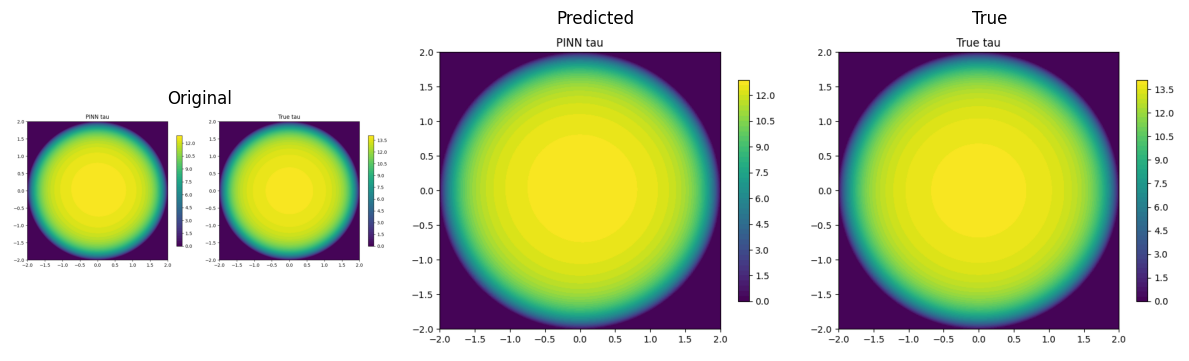

In [3]:
# Upload one PNG
uploaded = files.upload()
fname = list(uploaded.keys())[0]

# If original is [pred | true], use side_with_true="right"
orig, pred_img, true_img = crop_two_panel(fname, side_with_true="right", split="half")

# Visual check: predicted on left, true on right
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(orig);     axes[0].set_title("Original");   axes[0].axis("off")
axes[1].imshow(pred_img); axes[1].set_title("Predicted");  axes[1].axis("off")
axes[2].imshow(true_img); axes[2].set_title("True");       axes[2].axis("off")
plt.tight_layout()
plt.show()

In [4]:
# If correct, save
pred_img.save("simple_pred.png")  # adapt name per method
#true_img.save("true_solution.png")    # maybe only once from your favorite file